In [24]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [25]:
all_df = pd.read_csv("data/data2.csv")

In [26]:
X=all_df.drop(['readmitted'], axis=1).values.astype('float64')
Y = all_df['readmitted'].values.astype('int64')

In [27]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

78441

In [28]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [29]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [30]:
train_Label = train_Label.reshape(train_Label.shape[0], 1)
test_Label= test_Label.reshape(test_Label.shape[0], 1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [32]:
model = Sequential()

In [33]:
model.add(Conv1D(filters=70*3,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(70,1), 
                 activation='relu'))

In [34]:
model.add(MaxPooling1D(pool_size=1))

In [35]:
model.add(Conv1D(filters=70*2,
                 kernel_size=3,
                 padding='valid',
                
                 activation='relu'))

In [36]:
model.add(MaxPooling1D(pool_size=1))

In [37]:
model.add(Conv1D(filters=70,
                 kernel_size=3,
                 padding='valid',
                 
                 activation='relu'))

In [38]:
model.add(MaxPooling1D(pool_size=1))

In [39]:
model.add(Flatten())

In [40]:
model.add(Dense(70, activation='tanh'))

In [41]:
model.add(Dense(1,activation='sigmoid'))

In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 68, 210)           840       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 68, 210)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 66, 140)           88340     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 66, 140)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 64, 70)            29470     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 64, 70)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4480)              0         
__________

In [43]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [44]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=60, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 62752 samples, validate on 15689 samples
Epoch 1/60
62752/62752 [==============================] - 182s 3ms/step - loss: 0.6640 - acc: 0.5981 - val_loss: 0.6545 - val_acc: 0.6154
Epoch 2/60
62752/62752 [==============================] - 171s 3ms/step - loss: 0.6494 - acc: 0.6223 - val_loss: 0.6505 - val_acc: 0.6187
Epoch 3/60
62752/62752 [==============================] - 164s 3ms/step - loss: 0.6474 - acc: 0.6247 - val_loss: 0.6481 - val_acc: 0.6179
Epoch 4/60
62752/62752 [==============================] - 165s 3ms/step - loss: 0.6467 - acc: 0.6235 - val_loss: 0.6482 - val_acc: 0.6165
Epoch 5/60
62752/62752 [==============================] - 166s 3ms/step - loss: 0.6465 - acc: 0.6248 - val_loss: 0.6467 - val_acc: 0.6208
Epoch 6/60
62752/62752 [==============================] - 174s 3ms/step - loss: 0.6450 - acc: 0.6251 - val_loss: 0.6472 - val_acc: 0.6201
Epoch 7/60
62752/62752 [==============================] - 183s 3ms/step - loss: 0.6443 - acc: 0.6262 - val_loss: 0.6463 - 

In [45]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

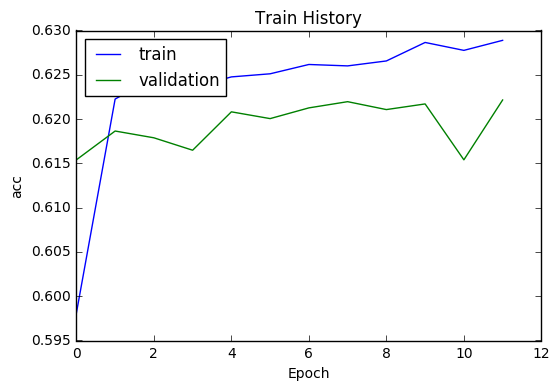

In [46]:
show_train_history(train_history,'acc','val_acc')

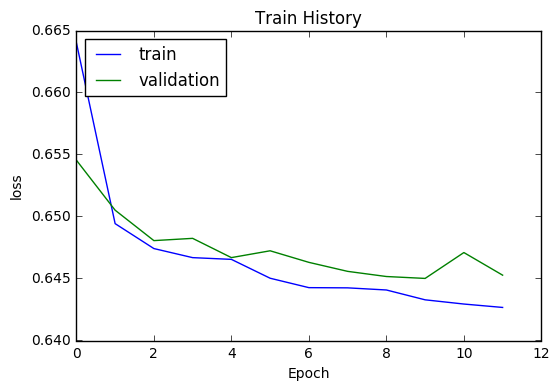

In [47]:
show_train_history(train_history,'loss','val_loss')

In [48]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

19611/19611 [==============================] - 40s 2ms/step


In [49]:
scores[1]

0.6211819897361305